In [660]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mpl.style.use('ggplot')

Две организации занимались контроллем за выборами в Беларуси Зубр и Голос. Зубр занимался наблюдением, а также собрали фото протоколов (в Беларуси не публикуют данные по каждому участку). На платформе голоса каждый, кто проголосовал, мог обозначить за кого и на каком участке. Причем на голосе нужно было пройти верификацию, так что их данным можно доверять.
После выборов обе инициативы выпустили совместный отчет : https://drive.google.com/file/d/1kSprtBUUtS1vb-W_jc4QJkPkoZPJBWxd/view?usp=sharing, а также оцифровали фотографии всех протоколов : https://drive.google.com/file/d/1tMYku50vb6jBawXXrj2SRRHlRi_OA_vy/view

In [235]:
data = pd.read_csv('/Users/a1/Desktop/pandas data/dataup.csv')

Я же к данным по изибирательным участкам (вторая ссылка) спарсил подтвержденные, по данным Голоса, голоса за Тихановскую на этих участках - колонка golosdata. Вероятность, что все проголосовавшие за Тихоновскую также обозначили свой выбор на Голосе стримится к нулю. Поэтому все участки, где на фото протокола голосов за Тихоновскую больше, чем по данным голоса, я отнес к участкам с честным подсчетом. А участки, где в протоколе голосов за Тихоновскую, меньше чем на Голосе, отнес к участкам с нечестным подсчетом.
По итогу получилась табличка, где все участки классифицированны по признаку golos=true/false(последняя колонка), где golos=true/false=1 - это участки с честным подсчетом, а golos=true/false=0 c фальсификациями.  

In [236]:
data.drop(('Unnamed: 0'), axis=1, inplace=True)

In [237]:
data['golos=true/false']=data['golos=true/false'].astype('category')
data['region'] = data['region'].astype('category')
data['winner'] = data['winner'].astype('object')

In [468]:
pd.set_option('display.max_columns', 100)
data.head()

,region,district,city,number,voters,voterst,voteearly,votehome,votemainday,dmitriev,kanopackaya,lukashenko,tichanovskaya,cherchen,againstall,falseblanc,brokedblanks,other,tornout,lukashenkoper,tichanivskayaper,kanopackayaper,cherchenper,dmitrievper,earlytornout,maindaytornout,againstallper,homeper,early/main,rtronout,rearlytornout,golosdata,golos=true/false,winner
0,Брестская,Брест - Московский,Брест,3,1512.0,1482,547.0,25.0,910.0,22.0,47,1150,127,21.0,101.0,14.0,1.0,32.0,98.015880,77.597840,8.569501,3.171390,1.417004,1.484480,36.177250,60.185184,6.815114,1.653439,37,98.0,36.0,299,0,0
1,Брестская,Брест - Московский,Брест,8,1570.0,1486,503.0,46.0,937.0,32.0,16,1058,147,42.0,191.0,NaN,NaN,NaN,94.649680,71.197845,9.892328,1.076716,2.826379,2.153432,32.038216,59.681530,12.853297,2.929936,34,95.0,32.0,237,0,0
2,Брестская,Брест - Московский,Брест,17,1445.0,1223,339.0,30.0,854.0,18.0,10,856,136,12.0,191.0,NaN,NaN,NaN,84.636680,69.991820,11.120196,0.817661,0.981194,1.471791,23.460207,59.100346,15.617334,2.076125,28,85.0,23.0,159,0,0
3,Брестская,Брест - Московский,Брест,20,1678.0,1595,593.0,96.0,906.0,14.0,17,1196,198,16.0,154.0,NaN,NaN,NaN,95.053635,74.984330,12.413794,1.065831,1.003135,0.877743,35.339690,53.992847,9.655172,5.721096,37,95.0,35.0,230,0,0
4,Брестская,Брест - Московский,Брест,30,2126.0,1880,662.0,67.0,1151.0,29.0,22,1412,169,29.0,211.0,8.0,NaN,318.0,88.428980,75.106384,8.989362,1.170213,1.542553,1.542553,31.138288,54.139230,11.223404,3.151458,35,88.0,31.0,258,0,0


На уровне участковой избирательной комиссии есть три вида фальсификаций: вброс на досрочном голосовании, переписывание протокола и переброс голосов к другому кандидату. На участках, где посчитали честно остается только один способ: нарисовать досрочную явку. Что, собственное, и видно на графике зависимости процента Лукашенко и Тихановской от досрочной явки. 

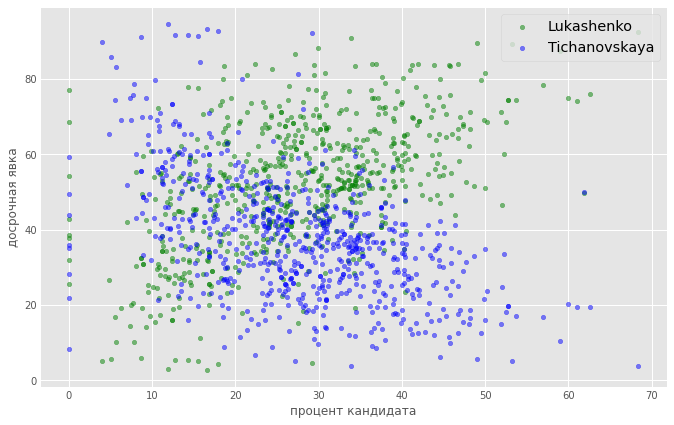

In [662]:
ax0=data[data['golos=true/false']==1].plot(kind='scatter', x='earlytornout', y='lukashenkoper' , figsize=(10, 7),  alpha=0.5,color='green')
ax1=data[data['golos=true/false']==1].plot(kind='scatter', x='earlytornout', y='tichanivskayaper' , figsize=(10, 7), alpha=0.5, color="blue", ax=ax0)
ax0.set_ylabel('досрочная явка')
ax0.set_xlabel('процент кандидата')
ax0.legend(['Lukashenko', 'Tichanovskaya'], loc='upper right', fontsize='x-large')

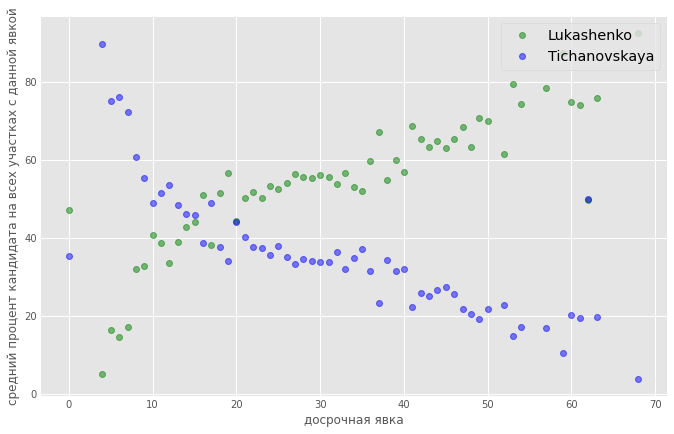

In [663]:
ax0=data[(data['golos=true/false']==1)& (data['district']!= 'Зарубежный')].pivot_table('lukashenkoper', index='rearlytornout', aggfunc='mean').plot(marker='o',linestyle='none', figsize=(10, 7), color='green', alpha=0.5)#kind='scatter', x ='rearlytornout', y='lukashenkoper')
ax1=data[(data['golos=true/false']==1)& (data['district']!= 'Зарубежный')].pivot_table('tichanivskayaper', index='rearlytornout', aggfunc='mean' ).plot(marker='o',linestyle='none',figsize=(10, 7), ax=ax0, color='blue', alpha=0.5)
ax0.set_xlabel('досрочная явка')
ax0.set_ylabel('средний процент кандидата на всех участках с данной явкой')
ax0.legend(['Lukashenko', 'Tichanovskaya'], loc='upper right', fontsize='x-large')

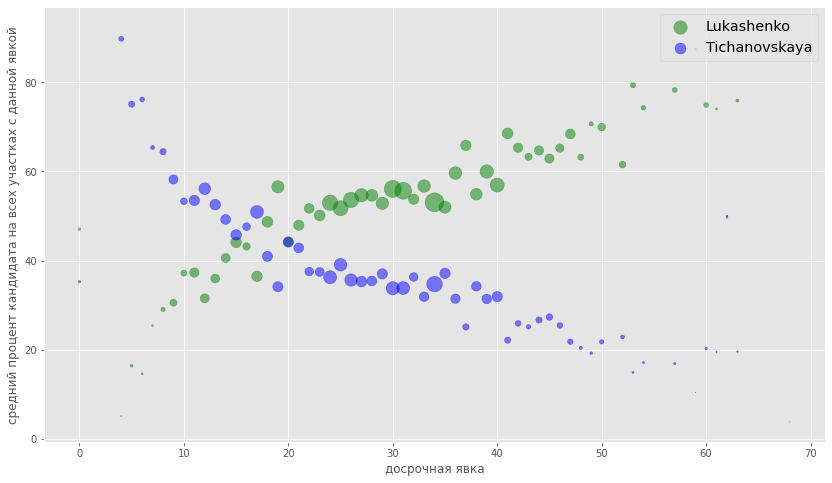

In [592]:
ax0 = datal.plot(kind='scatter',x='rearlytornout',y='lukashenkoper',figsize=(14, 8),alpha=0.5, s=s1/90,color='green')

ax1 = datat.plot(kind='scatter',x='rearlytornout', y='tichanivskayaper',alpha=0.5,color="blue",s=s2/90,ax = ax0)
ax0.set_xlabel('досрочная явка')
ax0.set_ylabel('средний процент кандидата на всех участках с данной явкой')
ax0.legend(['Lukashenko', 'Tichanovskaya'], loc='upper right', fontsize='x-large')

Размер точки соответствует кол-ву голосов отдданных за кандидата на участках с данной явкой

На графике зависимости кол-ва выигранных участков каждым кандидатом от досрочной явки видно что анамалии начинаются от 20%, немного выравнивается на 24-25%, а дальше уходят в отрыв.
Так же досрочную явку проанализировал Сергей Шпилькин и тоже пришел к выводу реальная досрочная явка это 24% по среднему занчению или 20% по медиане.
https://www.facebook.com/notes/778234429682058/

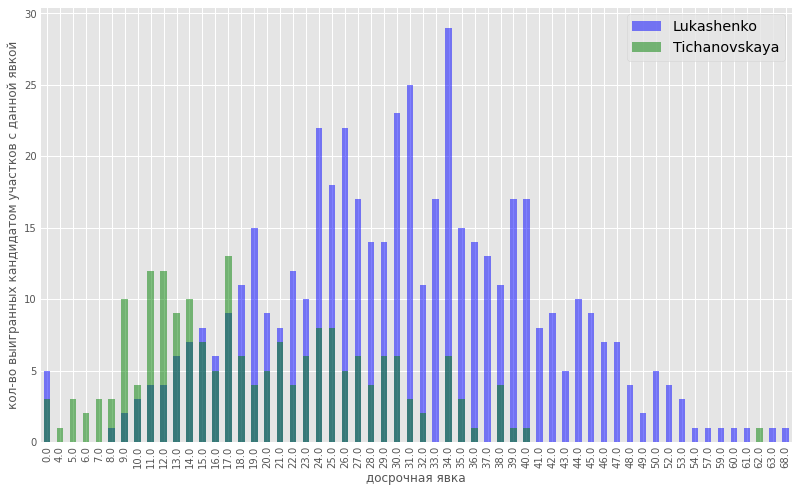

In [670]:
x = data[(data['winner']==0)  &  (data['golos=true/false']==1)].pivot_table('winner', index='rearlytornout', aggfunc='count' )
x=x.rename(columns={'winner':'winner=0'})
x = x.reset_index()
x = x.merge(data[(data['winner']==1)  &  (data['golos=true/false']==1)].pivot_table('winner', index='rearlytornout', aggfunc='count' ).rename(columns={'winner':'winner=1'}).reset_index(), how='outer' )
x = x.fillna(0)
x = x.sort_values('rearlytornout')
ax0 = x.plot(kind='bar', x='rearlytornout',y='winner=0', color='blue', alpha=0.5,figsize=(12,8))
ax1 = x.plot(kind='bar', x='rearlytornout',y='winner=1', color='green', alpha=0.5,figsize=(12,8), ax=ax0)
ax0.set_ylabel('кол-во выигранных кандидатом участков с данной явкой')
ax0.set_xlabel('досрочная явка')
ax0.legend(['Lukashenko', 'Tichanovskaya'], loc='upper right', fontsize='x-large')

Зная реальную досрочную явку нужно постараться вычленить участки без вбросов. Тут у меня первая загвоздка. Тк я пока не придумал по какому признаку вычленить участки без вбросов. Поэтому просто руками довел медиану до 20%. В этот моменте мне очень нужна помощь.

In [255]:
data[(data['golos=true/false']==1) & (data['earlytornout'] < 29.4) ].earlytornout.median()

20.0254315

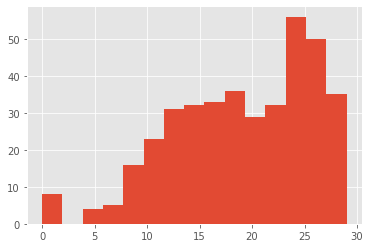

In [9]:
data[(data['golos=true/false']==1) & (data['earlytornout'] < 29.4) ].rearlytornout.hist(bins=15)

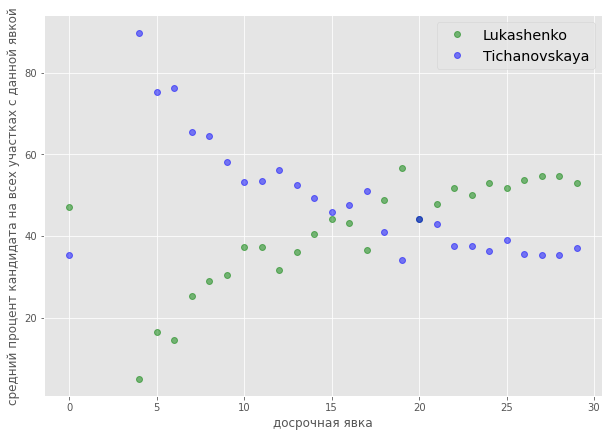

In [594]:
ax0=data[(data['golos=true/false']==1)& (data['rearlytornout'] <29.4)].pivot_table('lukashenkoper', index='rearlytornout', aggfunc='mean').plot(marker='o',linestyle='none', figsize=(10, 7), color='green', alpha=0.5)#kind='scatter', x ='rearlytornout', y='lukashenkoper')
ax1=data[(data['golos=true/false']==1)& (data['rearlytornout'] <29.4)].pivot_table('tichanivskayaper', index='rearlytornout', aggfunc='mean' ).plot(marker='o',linestyle='none',figsize=(10, 7), ax=ax0, color='blue', alpha=0.5)
ax0.set_xlabel('досрочная явка')
ax0.set_ylabel('средний процент кандидата на всех участках с данной явкой')
ax0.legend(['Lukashenko', 'Tichanovskaya'], loc='upper right', fontsize='x-large')

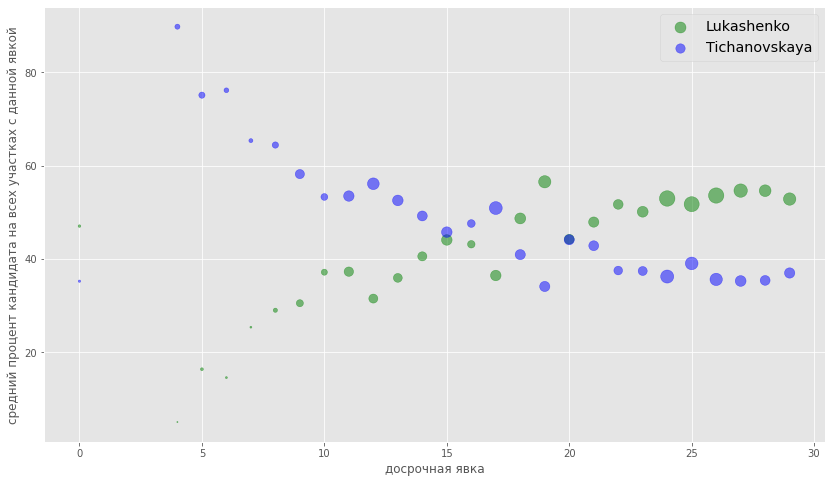

In [595]:
datal = pd.pivot_table(data[(data['golos=true/false']==1)& (data['rearlytornout'] <29.4)],values =['lukashenkoper', 'lukashenko'], index='rearlytornout', aggfunc={'lukashenkoper':'mean','lukashenko':'sum'})
datal = datal.reset_index()
s1=datal.lukashenko
datat = pd.pivot_table(data[(data['golos=true/false']==1)& (data['rearlytornout'] <29.4)],values =['tichanivskayaper', 'tichanovskaya'], index='rearlytornout', aggfunc={'tichanivskayaper':'mean','tichanovskaya':'sum'})
datat = datat.reset_index()
s2 = datat.tichanovskaya
ax0 = datal.plot(kind='scatter',x='rearlytornout',y='lukashenkoper',figsize=(14, 8),alpha=0.5, s=s1/90,color='green')
ax1 = datat.plot(kind='scatter', x='rearlytornout',y='tichanivskayaper',alpha=0.5,color="blue",s=s2/90,ax = ax0 )
ax0.set_xlabel('досрочная явка')
ax0.set_ylabel('средний процент кандидата на всех участках с данной явкой')
ax0.legend(['Lukashenko', 'Tichanovskaya'], loc='upper right', fontsize='x-large')


In [436]:
re = 29.4 # фильтр для досрочной явки

Дальше я посчитал процент избирателей, который приходится на каждую область по данным ЦИК (rdict).
http://www.rec.gov.by/files/2020/gol_itog.pdf

In [437]:
rdict = {'Брестская': 0.145, 'Витебская': 0.123, 'Гомельская': 0.155, 'Гродненская':0.111, 'Минская' : 0.167, 'Могилевская': 0.116, 'Минск': 0.183}

In [438]:
data[(data['golos=true/false']==1) & (data['earlytornout'] < re)].groupby('region').voterst.sum()

region
Брестская       75905
Витебская       37234
Гомельская      33155
Гродненская     77296
Минск           77362
Минская        179356
Могилевская     25396
Name: voterst, dtype: int64

Данные собирались волонтерами, поэтому количество протоклов распределилось неравновмерно. Меньше всего данных о Могилевской области, поэтому на ее базе считаю 100% голосов для модели.

In [439]:
x = int(data[(data['golos=true/false']==1) & (data['earlytornout'] < re) & (data['region']=='Могилевская')].voterst.sum()/0.116/1.7)
x

128782

Беру половину, чтобы была ротация для каждой симуляции. Число можно поменять, здесь тоже не помешало бы придумать какой-то метод.

In [440]:
vdict = {}
for k,v in rdict.items():
    vdict[k]=int(v*x)
vdict

{'Брестская': 18673,
 'Витебская': 15840,
 'Гомельская': 19961,
 'Гродненская': 14294,
 'Минская': 21506,
 'Могилевская': 14938,
 'Минск': 23567}

Посчитал кол-во голосов для каждой области пропорционально кол-ву избирателей.

In [441]:
sd  = 500 # максимальное отклонение от количества-голосов

Я хочу написать функцию, которая будет рандомно выбирать протоколы для каждой области, но чтобы общее кол-во избирателей оставалось в пределе +-500 от значений в vdict. Сначала написал функцию, которая определяет оптимальное значение сэмплов для функции pd.sample()

In [445]:
def samples (k, v):
    slist = []
    for i in range(8, 20):
        sm = 0
        for z in range (1,10):
            if  data[(data['golos=true/false']==1) & (data['earlytornout'] < re)& (data['region']==k)].sample(i).voterst.sum() > v-sd and data[(data['golos=true/false']==1) & (data['earlytornout'] < re) & (data['region']==k)].sample(i).voterst.sum() < v+sd :
                sm +=1
        slist.append(sm)
    return slist.index(max(slist))+8
            

Теперь пишу саму функцию

In [443]:
def regres (k,v, s):   
        datax = data[(data['golos=true/false']==1) & (data['earlytornout'] < re) & (data['region']==k)].sample(s)
        if v-sd < datax.voterst.sum() < v+sd :
            return [datax.voterst.sum(), datax.lukashenko.sum(),datax.tichanovskaya.sum()]
        else:
            return regres (k,v, s)

Считаю сэмплы для каждой области. А потом сто раз выбираю рандомно протоколы в каждой области и считаю результат. 

In [446]:
sdict = {}
for k, v in vdict.items():
    sdict[k] = samples(k,v)
result = pd.DataFrame()
for i in range(0,100):
    luk = 0
    tich = 0
    tot = 0
    for k, v in vdict.items():
        x = regres(k,v, sdict[k])
        tich += x[2]
        luk += x[1]
        tot += x[0]
    dataapp = pd.Series({'Lukashenko':luk/tot,'Tichanovskaya':tich/tot})
    dataapp = dataapp.to_frame().T
    result = result.append(dataapp)

Вот и результат

In [447]:
result

,Lukashenko,Tichanovskaya
0,0.493403,0.394477
0,0.457008,0.435460
0,0.478878,0.413213
0,0.467550,0.427909
0,0.491331,0.399074
0,0.470292,0.419576
0,0.471564,0.416357
0,0.440631,0.449629
0,0.456537,0.425998
0,0.462797,0.424622


In [448]:
result.nunique()

Lukashenko       100
Tichanovskaya    100
dtype: int64

In [449]:
result.mean()

Lukashenko       0.467182
Tichanovskaya    0.423935
dtype: float64

In [450]:
result.median()

Lukashenko       0.468200
Tichanovskaya    0.424498
dtype: float64

Мой метод отличается от электоральной статистики тем, что на основе данных Голоса я классифицировал протоколы на участки с честным и не честным подсчетом. Среди протоколов с честным подсчетом постарался отобрать участки без вбросов на досрочном голосовании (хотя методология нуждается в доработке). И посчитал результаты выборов на основе протоколов с честных участков, с сохранением пропорции между всеми 7 областями.